In [72]:
pip install opacus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.8/224.8 kB 6.5 MB/s eta 0:00:00


In [68]:
pip install diffprivlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 5.4 MB/s eta 0:00:00


In [1]:
pip install --upgrade tensorflow-privacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.5/405.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 98.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 123.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 42.9 MB/

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import cv2
from keras.utils import to_categorical
import h5py
import shutil
import imgaug as aug
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import imgaug.augmenters as iaa
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from keras.layers import GlobalMaxPooling2D
from keras.utils import to_categorical
from keras.layers import BatchNormalization
from keras.layers import Concatenate
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import cv2
from keras import backend as K
color = sns.color_palette()
%matplotlib inline
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from tensorflow_privacy.privacy.optimizers.dp_optimizer import DPAdamGaussianOptimizer
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/XRAY_ETHICAL/Data_Entry_2017.csv')

In [5]:
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [6]:
data.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'],
      dtype='object')

In [7]:
new_column_names = ['Image_Index', 'Finding_Labels', 'Follow_up', 'Patient_ID', 'Patient_Age',
                    'Patient_Gender', 'View_Position', 'OriginalImageWidth', 'OriginalImageHeight', 'x_cord','y_cord', 'unnamed']

In [8]:
data.columns = new_column_names

In [9]:
data['Patient_ID'].value_counts()

10007    184
13670    173
15530    158
12834    157
13993    143
        ... 
13617      1
13610      1
13609      1
13607      1
30805      1
Name: Patient_ID, Length: 30805, dtype: int64

In [10]:
data.isnull().sum()

Image_Index                 0
Finding_Labels              0
Follow_up                   0
Patient_ID                  0
Patient_Age                 0
Patient_Gender              0
View_Position               0
OriginalImageWidth          0
OriginalImageHeight         0
x_cord                      0
y_cord                      0
unnamed                112120
dtype: int64

In [11]:
data = data.drop('unnamed', axis=1)

In [12]:
data['Follow_up'].value_counts()

0      30805
1      13302
2       9189
3       7089
4       5759
       ...  
177        1
176        1
174        1
173        1
183        1
Name: Follow_up, Length: 184, dtype: int64

Let's create two models:

1) Regression, Classification or any similar neural network using columns like follow up, age, gender and other to determine if a patient has disease or not.

2) A CNN model which uses images to predict the disease.

3) Combine both these results to see if a patient has a disease.

In [13]:
data['Finding_Labels'] = data['Finding_Labels'].apply(lambda x: 0 if x == 'No Finding' else 1)

In [14]:
data['Finding_Labels'].value_counts()

0    60361
1    51759
Name: Finding_Labels, dtype: int64

DROP IMAGES AFTER 00001335_006.png because we want just a subset of data which is in image1 folder.

In [15]:
data['Image_Index'][4998]

'00001335_006.png'

In [16]:
index_to_keep = data[data['Image_Index'] == '00001335_006.png'].index[0]
data = data.loc[:index_to_keep]

In [17]:
data['Image_Index'][4998]

'00001335_006.png'

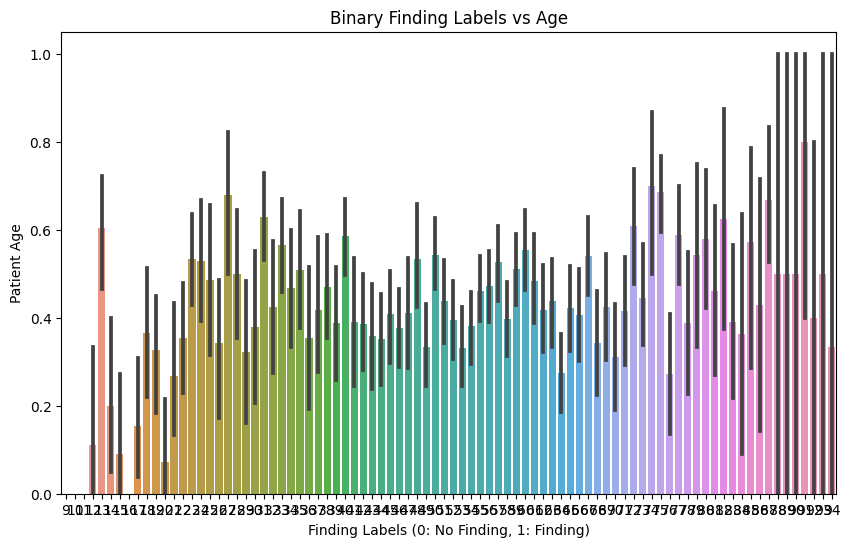

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Patient_Age', y='Finding_Labels', data=data)

plt.title('Binary Finding Labels vs Age')
plt.xlabel('Finding Labels (0: No Finding, 1: Finding)')
plt.ylabel('Patient Age')

plt.show()

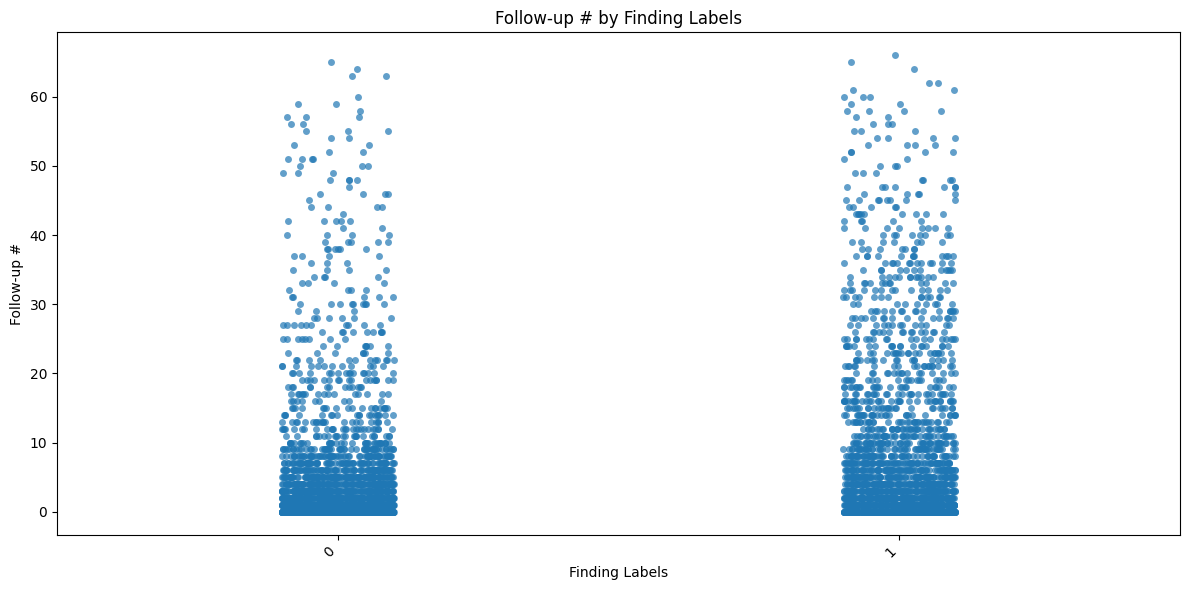

In [19]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='Finding_Labels', y='Follow_up', data=data, jitter=True, alpha=0.7)

plt.title('Follow-up # by Finding Labels')
plt.xlabel('Finding Labels')
plt.ylabel('Follow-up #')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

In [20]:
data['Follow_up'].value_counts()

0     1335
1      667
2      456
3      348
4      286
      ... 
62       2
63       2
64       2
65       2
66       1
Name: Follow_up, Length: 67, dtype: int64

<ipython-input-21-b6c7c9110e36>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


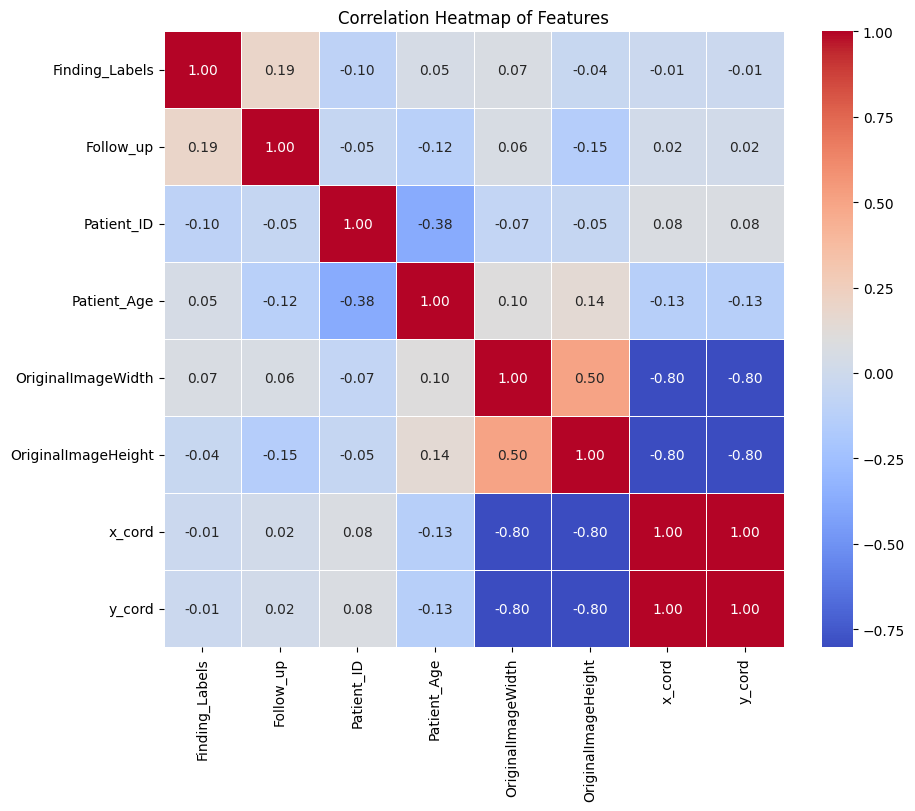

In [21]:
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap of Features')
plt.show()

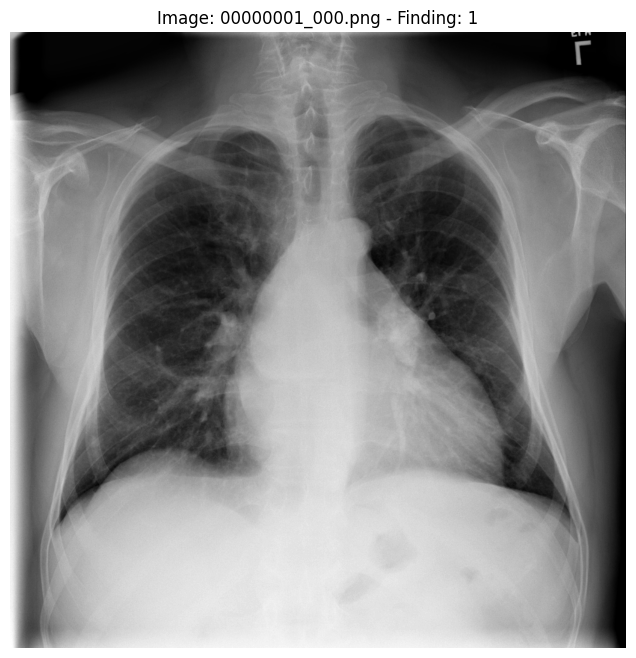

(1024, 1024)


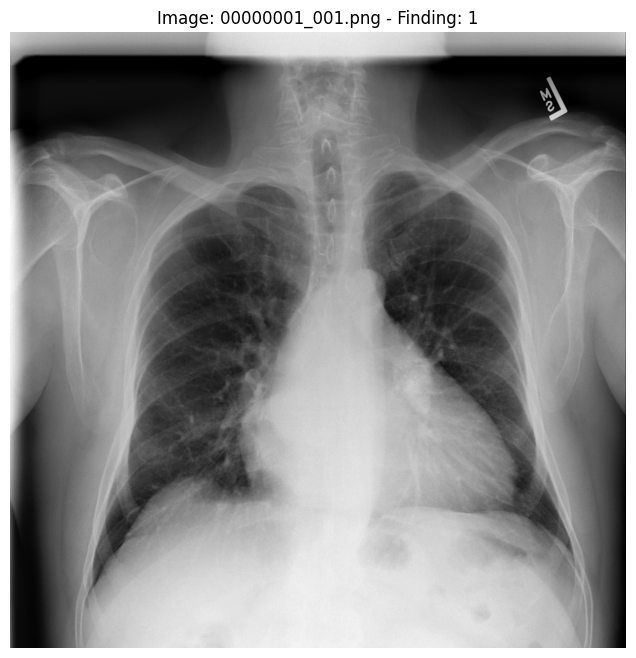

(1024, 1024)


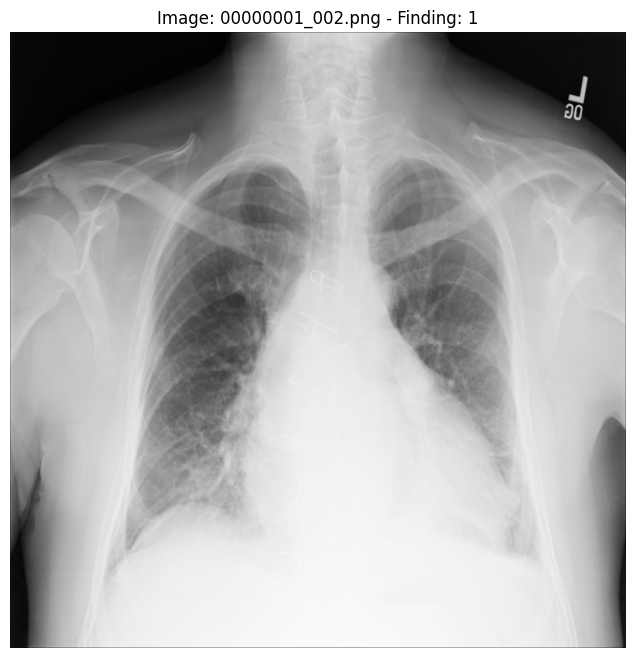

(1024, 1024)


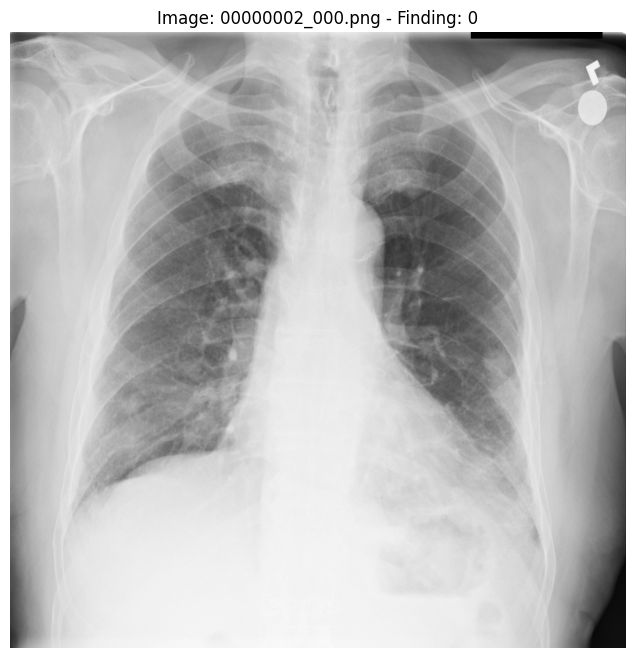

(1024, 1024)


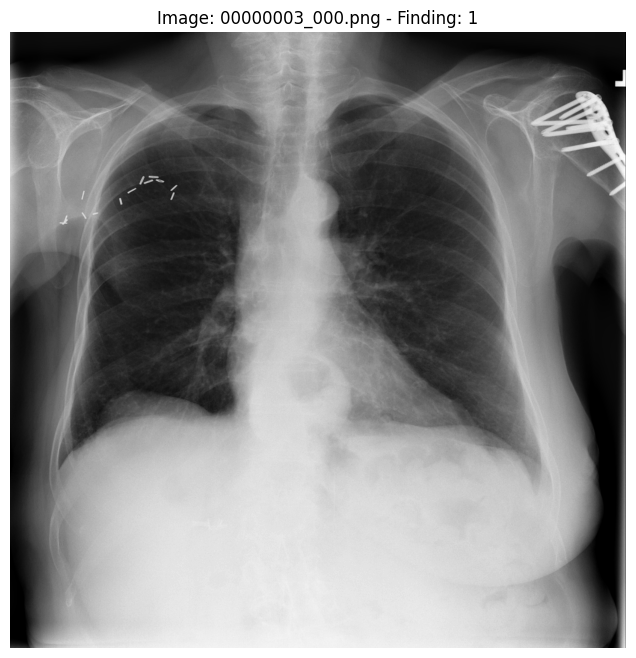

(1024, 1024)


In [22]:
image_dir = '/content/drive/MyDrive/XRAY_ETHICAL/images_001/images'

# Plot the first few images
num_images_to_plot = 5

for index in range(num_images_to_plot):
    image_path = os.path.join(image_dir, data['Image_Index'].iloc[index])
    img = mpimg.imread(image_path)

    plt.figure(figsize=(8, 8))
    plt.imshow(img, cmap='gray')  # Assuming grayscale images, adjust cmap if needed
    plt.title(f'Image: {data["Image_Index"].iloc[index]} - Finding: {data["Finding_Labels"].iloc[index]}')
    plt.axis('off')
    plt.show()
    print(img.shape)

Creating image path column corresponding to the image index

In [23]:
base_path = "/content/drive/MyDrive/XRAY_ETHICAL/images_001/images/"
data['image_path'] = base_path + data['Image_Index']

# Display the updated DataFrame
data[['Image_Index', 'image_path', 'Finding_Labels']].tail()

,Image_Index,image_path,Finding_Labels
4994,00001335_002.png,/content/drive/MyDrive/XRAY_ETHICAL/images_001...,0
4995,00001335_003.png,/content/drive/MyDrive/XRAY_ETHICAL/images_001...,0
4996,00001335_004.png,/content/drive/MyDrive/XRAY_ETHICAL/images_001...,0
4997,00001335_005.png,/content/drive/MyDrive/XRAY_ETHICAL/images_001...,0
4998,00001335_006.png,/content/drive/MyDrive/XRAY_ETHICAL/images_001...,1


In [24]:
data['Image_Index'].head(10)

0    00000001_000.png
1    00000001_001.png
2    00000001_002.png
3    00000002_000.png
4    00000003_000.png
5    00000003_001.png
6    00000003_002.png
7    00000003_003.png
8    00000003_004.png
9    00000003_005.png
Name: Image_Index, dtype: object

In [25]:
data['Image_Index'].str.split('_').str[0]

0       00000001
1       00000001
2       00000001
3       00000002
4       00000003
          ...   
4994    00001335
4995    00001335
4996    00001335
4997    00001335
4998    00001335
Name: Image_Index, Length: 4999, dtype: object

In [26]:
train_df, test_df = train_test_split(data, test_size=0.1, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

# Display the sizes of the sets
print("Train set size:", len(train_df))
print("Validation set size:", len(val_df))
print("Test set size:", len(test_df))

Train set size: 3374
Validation set size: 1125
Test set size: 500


In [27]:
train_df.head()

,Image_Index,Finding_Labels,Follow_up,Patient_ID,Patient_Age,Patient_Gender,View_Position,OriginalImageWidth,OriginalImageHeight,x_cord,y_cord,image_path
2175,00000573_001.png,0,1,573,54,M,PA,2992,2991,0.143,0.143,/content/drive/MyDrive/XRAY_ETHICAL/images_001...
2583,00000669_000.png,0,0,669,47,M,PA,2048,2500,0.168,0.168,/content/drive/MyDrive/XRAY_ETHICAL/images_001...
3583,00000971_001.png,0,1,971,54,F,PA,2048,2500,0.168,0.168,/content/drive/MyDrive/XRAY_ETHICAL/images_001...
4374,00001191_000.png,0,0,1191,44,M,PA,2790,2627,0.143,0.143,/content/drive/MyDrive/XRAY_ETHICAL/images_001...
864,00000211_018.png,1,18,211,59,F,AP,2500,2048,0.168,0.168,/content/drive/MyDrive/XRAY_ETHICAL/images_001...


In [28]:
df_train = train_df[['image_path','Finding_Labels']]
df_train.head()

,image_path,Finding_Labels
2175,/content/drive/MyDrive/XRAY_ETHICAL/images_001...,0
2583,/content/drive/MyDrive/XRAY_ETHICAL/images_001...,0
3583,/content/drive/MyDrive/XRAY_ETHICAL/images_001...,0
4374,/content/drive/MyDrive/XRAY_ETHICAL/images_001...,0
864,/content/drive/MyDrive/XRAY_ETHICAL/images_001...,1


In [29]:
df_train['Finding_Labels'].value_counts()

0    1880
1    1494
Name: Finding_Labels, dtype: int64

#Preparing validation data

In [30]:
valid_data = []
valid_labels = []

for index, row in val_df.iterrows():
    img_path = row['image_path']  # Adjust this based on your actual column name
    label = row['Finding_Labels']  # Adjust this based on your actual column name

    img = cv2.imread(str(img_path))
    img = cv2.resize(img, (224, 224))

    if img.shape[2] == 1:
        img = np.dstack([img, img, img])

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32) / 255.

    valid_data.append(img)
    valid_labels.append(label)

# Convert the list into numpy arrays
valid_data = np.array(valid_data)
valid_labels = np.array(valid_labels)

print("Total number of validation examples: ", valid_data.shape)
print("Total number of labels:", valid_labels.shape)

Total number of validation examples:  (1125, 224, 224, 3)
Total number of labels: (1125,)


In [31]:
valid_data.shape

(1125, 224, 224, 3)

# Creating an image augmentor

In [32]:
# Augmentation sequence
seq = iaa.OneOf([
    iaa.Fliplr(), # horizontal flips
    iaa.Affine(rotate=20), # roatation
    iaa.Multiply((1.2, 1.5))]) #random brightness

In [33]:
def data_gen(data, batch_size, directory_path):
  # Convert 'Finding_Labels' to string type
    data['Finding_Labels'] = data['Finding_Labels'].astype(str)
    # Create an instance of ImageDataGenerator without augmentation
    datagen = ImageDataGenerator(rescale=1./255)

    # Generate batches of data
    data_generator = datagen.flow_from_dataframe(
        dataframe=data,
        directory=directory_path,  # Specify the directory path
        x_col='image_path',  # Column containing image filenames
        y_col='Finding_Labels',  # Column containing labels
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',  # Assumes you have already converted labels to binary
        shuffle=True
    )

    return data_generator

In [34]:
# Example usage
train_data_gen = data_gen(df_train, batch_size=32, directory_path='/content/drive/MyDrive/XRAY_ETHICAL/images_001/images')

<ipython-input-33-8077b5601188>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Finding_Labels'] = data['Finding_Labels'].astype(str)


Found 3374 validated image filenames belonging to 2 classes.


In [35]:
# Assuming a simple model for binary classification
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='sigmoid'))  # Binary classification output

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the data generator
model.fit(train_data_gen, steps_per_epoch=len(df_train)//32, epochs=10)

Epoch 1/10
105/105 [==============================] - 2659s 25s/step - loss: 0.7003 - accuracy: 0.5604
Epoch 2/10
105/105 [==============================] - 90s 851ms/step - loss: 0.6708 - accuracy: 0.5874
Epoch 3/10
105/105 [==============================] - 89s 840ms/step - loss: 0.6690 - accuracy: 0.5910
Epoch 4/10
105/105 [==============================] - 89s 845ms/step - loss: 0.6526 - accuracy: 0.6146
Epoch 5/10
105/105 [==============================] - 88s 839ms/step - loss: 0.6318 - accuracy: 0.6388
Epoch 6/10
105/105 [==============================] - 89s 841ms/step - loss: 0.6046 - accuracy: 0.6664
Epoch 7/10
105/105 [==============================] - 89s 843ms/step - loss: 0.5611 - accuracy: 0.7029
Epoch 8/10
105/105 [==============================] - 89s 844ms/step - loss: 0.5141 - accuracy: 0.7334
Epoch 9/10
105/105 [==============================] - 88s 838ms/step - loss: 0.4480 - accuracy: 0.7726
Epoch 10/10
105/105 [==============================] - 90s 849ms/step - l

In [36]:
valid_labels.shape

(1125,)

In [37]:
from keras.utils import to_categorical

# Convert labels to one-hot encoded format
valid_labels_binary = to_categorical(valid_labels, num_classes=2)

# Now you can use these one-hot encoded labels for evaluation
evaluation_result = model.evaluate(valid_data, valid_labels_binary)

# Print the evaluation result
print("Validation Loss:", evaluation_result[0])
print("Validation Accuracy:", evaluation_result[1])

36/36 [==============================] - 6s 167ms/step - loss: 1.1108 - accuracy: 0.5813
Validation Loss: 1.1107984781265259
Validation Accuracy: 0.581333339214325


In [38]:
def build_model():
    input_img = Input(shape=(224,224,3), name='ImageInput')
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_1')(input_img)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_2')(x)
    x = MaxPooling2D((2,2), name='pool1')(x)

    x = SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv2_1')(x)
    x = SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv2_2')(x)
    x = MaxPooling2D((2,2), name='pool2')(x)

    x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_1')(x)
    x = BatchNormalization(name='bn1')(x)
    x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_3')(x)
    x = MaxPooling2D((2,2), name='pool3')(x)

    x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_1')(x)
    x = BatchNormalization(name='bn3')(x)
    x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_2')(x)
    x = BatchNormalization(name='bn4')(x)
    x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_3')(x)
    x = MaxPooling2D((2,2), name='pool4')(x)

    x = Flatten(name='flatten')(x)
    x = Dense(1024, activation='relu', name='fc1')(x)
    x = Dropout(0.7, name='dropout1')(x)
    x = Dense(512, activation='relu', name='fc2')(x)
    x = Dropout(0.5, name='dropout2')(x)
    x = Dense(2, activation='softmax', name='fc3')(x)

    model = Model(inputs=input_img, outputs=x)
    return model

In [39]:
model1 =  build_model()
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ImageInput (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 Conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 Conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 Conv2_1 (SeparableConv2D)   (None, 112, 112, 128)     8896      
                                                                 
 Conv2_2 (SeparableConv2D)   (None, 112, 112, 128)     17664     
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0     

In [40]:
# Define the optimizer with learning_rate only
opt = Adam(learning_rate=0.0001)

# Define callbacks
es = EarlyStopping(patience=5)
#chkpt = ModelCheckpoint(filepath='best_model_todate', save_best_only=True, save_weights_only=True)

# Compile the model with the specified optimizer
model1.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)

# Train the model without validation
history = model1.fit(
    train_data_gen,  # Assuming you have a generator for training data
    steps_per_epoch=len(df_train)//32,
    epochs=10,  # Adjust as needed
    callbacks=[es]  # Early stopping and model checkpoint callbacks
)

Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 0.6861 - accuracy: 0.5539

105/105 [==============================] - 528s 5s/step - loss: 0.6861 - accuracy: 0.5539
Epoch 2/10
105/105 [==============================] - ETA: 0s - loss: 0.6807 - accuracy: 0.5607

105/105 [==============================] - 526s 5s/step - loss: 0.6807 - accuracy: 0.5607
Epoch 3/10
105/105 [==============================] - ETA: 0s - loss: 0.6768 - accuracy: 0.5865

105/105 [==============================] - 517s 5s/step - loss: 0.6768 - accuracy: 0.5865
Epoch 4/10
105/105 [==============================] - ETA: 0s - loss: 0.6693 - accuracy: 0.6026

105/105 [==============================] - 505s 5s/step - loss: 0.6693 - accuracy: 0.6026
Epoch 5/10
105/105 [==============================] - ETA: 0s - loss: 0.6651 - accuracy: 0.6065

105/105 [==============================] - 497s 5s/step - loss: 0.6651 - accuracy: 0.6065
Epoch 6/10
105/105 [==============================] - ETA: 0s - loss: 0.6624 - accuracy: 0.6188

105/105 [==============================] - 492s 5s/step - loss: 0.6624 - accuracy: 0.6188
Epoch 7/10
105/105 [==============================] - ETA: 0s - loss: 0.6610 - accuracy: 0.6125

105/105 [==============================] - 490s 5s/step - loss: 0.6610 - accuracy: 0.6125
Epoch 8/10
105/105 [==============================] - ETA: 0s - loss: 0.6583 - accuracy: 0.6161

105/105 [==============================] - 489s 5s/step - loss: 0.6583 - accuracy: 0.6161
Epoch 9/10
105/105 [==============================] - ETA: 0s - loss: 0.6618 - accuracy: 0.6116

105/105 [==============================] - 492s 5s/step - loss: 0.6618 - accuracy: 0.6116
Epoch 10/10
105/105 [==============================] - ETA: 0s - loss: 0.6559 - accuracy: 0.6200

105/105 [==============================] - 492s 5s/step - loss: 0.6559 - accuracy: 0.6200


In [41]:
evaluation_result1 = model1.evaluate(valid_data, valid_labels_binary)

# Print the evaluation result
print("Validation Loss:", evaluation_result1[0])
print("Validation Accuracy:", evaluation_result1[1])

36/36 [==============================] - 38s 1s/step - loss: 0.6597 - accuracy: 0.6142
Validation Loss: 0.659731924533844
Validation Accuracy: 0.6142222285270691


In [42]:

def buildvgg_model():
    # Load the VGG16 model with pre-trained weights
    vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Create a sequential model with the VGG16 layers
    model = Sequential()
    for layer in vgg16.layers[:-1]:  # Exclude the last layer (fully connected layer)
        model.add(layer)

    # Freeze the VGG16 layers
    for layer in model.layers:
        layer.trainable = False

    # Additional layers
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv1_1'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='Conv1_2'))
    model.add(MaxPooling2D((2, 2), name='pool1'))

    model.add(SeparableConv2D(128, (3, 3), activation='relu', padding='same', name='Conv2_1'))
    model.add(SeparableConv2D(128, (3, 3), activation='relu', padding='same', name='Conv2_2'))

    # Check dimensions before applying MaxPooling2D
    if model.layers[-1].output.shape[1] > 1 and model.layers[-1].output.shape[2] > 1:
        model.add(MaxPooling2D((2, 2), name='pool2'))

    model.add(SeparableConv2D(256, (3, 3), activation='relu', padding='same', name='Conv3_1'))
    model.add(BatchNormalization(name='bn1'))
    model.add(SeparableConv2D(256, (3, 3), activation='relu', padding='same', name='Conv3_2'))
    model.add(BatchNormalization(name='bn2'))
    model.add(SeparableConv2D(256, (3, 3), activation='relu', padding='same', name='Conv3_3'))

    # Check dimensions before applying MaxPooling2D
    if model.layers[-1].output.shape[1] > 1 and model.layers[-1].output.shape[2] > 1:
        model.add(MaxPooling2D((2, 2), name='pool3'))

    model.add(SeparableConv2D(512, (3, 3), activation='relu', padding='same', name='Conv4_1'))
    model.add(BatchNormalization(name='bn3'))
    model.add(SeparableConv2D(512, (3, 3), activation='relu', padding='same', name='Conv4_2'))
    model.add(BatchNormalization(name='bn4'))
    model.add(SeparableConv2D(512, (3, 3), activation='relu', padding='same', name='Conv4_3'))

    # Check dimensions before applying MaxPooling2D
    if model.layers[-1].output.shape[1] > 1 and model.layers[-1].output.shape[2] > 1:
        model.add(MaxPooling2D((2, 2), name='pool4'))

    model.add(Flatten(name='flatten'))
    model.add(Dense(1024, activation='relu', name='fc1'))
    model.add(Dropout(0.7, name='dropout1'))
    model.add(Dense(512, activation='relu', name='fc2'))
    model.add(Dropout(0.5, name='dropout2'))
    model.add(Dense(2, activation='softmax', name='fc3'))

    return model

In [43]:
vggweight_model = buildvgg_model()
vggweight_model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                       

In [44]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=1e-5)

# Define callbacks
es = EarlyStopping(patience=5)
#chkpt = ModelCheckpoint(filepath='best_model_todate', save_best_only=True, save_weights_only=True)

# Compile the model with the specified optimizer
vggweight_model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)

# Train the model without validation
history = vggweight_model.fit(
    train_data_gen,  # Assuming you have a generator for training data
    steps_per_epoch=len(df_train)//64,
    epochs=10,  # Adjust as needed
    callbacks=[es]  # Early stopping and model checkpoint callbacks
)


Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.5492

52/52 [==============================] - 129s 2s/step - loss: 0.6926 - accuracy: 0.5492
Epoch 2/10
52/52 [==============================] - ETA: 0s - loss: 0.6910 - accuracy: 0.5577

52/52 [==============================] - 131s 3s/step - loss: 0.6910 - accuracy: 0.5577
Epoch 3/10
52/52 [==============================] - ETA: 0s - loss: 0.6878 - accuracy: 0.5673

52/52 [==============================] - 129s 2s/step - loss: 0.6878 - accuracy: 0.5673
Epoch 4/10
52/52 [==============================] - ETA: 0s - loss: 0.6883 - accuracy: 0.5553

52/52 [==============================] - 129s 2s/step - loss: 0.6883 - accuracy: 0.5553
Epoch 5/10
52/52 [==============================] - ETA: 0s - loss: 0.6771 - accuracy: 0.5547

52/52 [==============================] - 129s 2s/step - loss: 0.6771 - accuracy: 0.5547
Epoch 6/10
52/52 [==============================] - ETA: 0s - loss: 0.6538 - accuracy: 0.6118

52/52 [==============================] - 131s 3s/step - loss: 0.6538 - accuracy: 0.6118
Epoch 7/10
52/52 [==============================] - ETA: 0s - loss: 0.6298 - accuracy: 0.6436

52/52 [==============================] - 130s 2s/step - loss: 0.6298 - accuracy: 0.6436
Epoch 8/10
52/52 [==============================] - ETA: 0s - loss: 0.6211 - accuracy: 0.6653

52/52 [==============================] - 135s 3s/step - loss: 0.6211 - accuracy: 0.6653
Epoch 9/10
52/52 [==============================] - ETA: 0s - loss: 0.6228 - accuracy: 0.6725

52/52 [==============================] - 132s 3s/step - loss: 0.6228 - accuracy: 0.6725
Epoch 10/10
52/52 [==============================] - ETA: 0s - loss: 0.6024 - accuracy: 0.6905

52/52 [==============================] - 134s 3s/step - loss: 0.6024 - accuracy: 0.6905


In [45]:
evaluation_resultvgg = vggweight_model.evaluate(valid_data, valid_labels_binary)

# Print the evaluation result
print("Validation Loss:", evaluation_resultvgg[0])
print("Validation Accuracy:", evaluation_resultvgg[1])

36/36 [==============================] - 83s 2s/step - loss: 0.6924 - accuracy: 0.5307
Validation Loss: 0.6924341320991516
Validation Accuracy: 0.5306666493415833


In [46]:
test_data = []
test_labels = []

for index, row in test_df.iterrows():
    img_path = row['image_path']  # Adjust this based on your actual column name
    label = row['Finding_Labels']  # Adjust this based on your actual column name

    img = cv2.imread(str(img_path))
    img = cv2.resize(img, (224, 224))

    if img.shape[2] == 1:
        img = np.dstack([img, img, img])

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32) / 255.

    test_data.append(img)
    test_labels.append(label)

# Convert the list into numpy arrays
test_data = np.array(test_data)
test_labels = np.array(test_labels)

print("Total number of validation examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of validation examples:  (500, 224, 224, 3)
Total number of labels: (500,)


In [47]:
# Convert labels to one-hot encoded format
test_labels_binary = to_categorical(test_labels, num_classes=2)

# Evaluation on test dataset
test_loss, test_score = vggweight_model.evaluate(test_data, test_labels_binary, batch_size=16)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

32/32 [==============================] - 37s 1s/step - loss: 0.6838 - accuracy: 0.5540
Loss on test set:  0.6837635636329651
Accuracy on test set:  0.5540000200271606


32/32 [==============================] - 3s 85ms/step


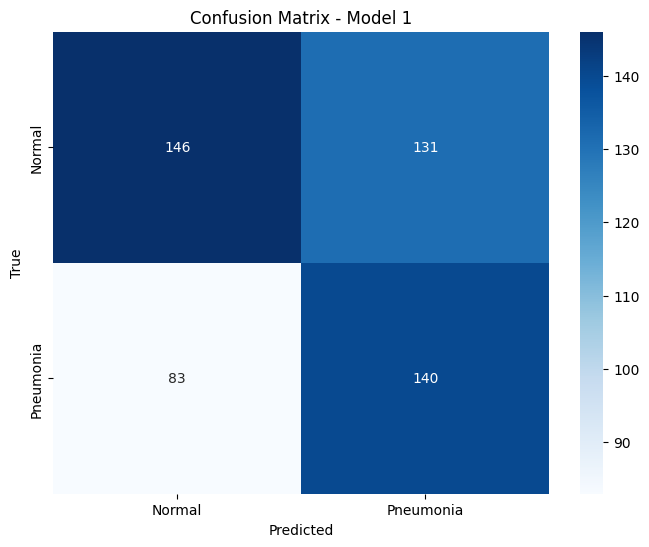

Testing Accuracy for Model 1: 0.572
32/32 [==============================] - 17s 521ms/step


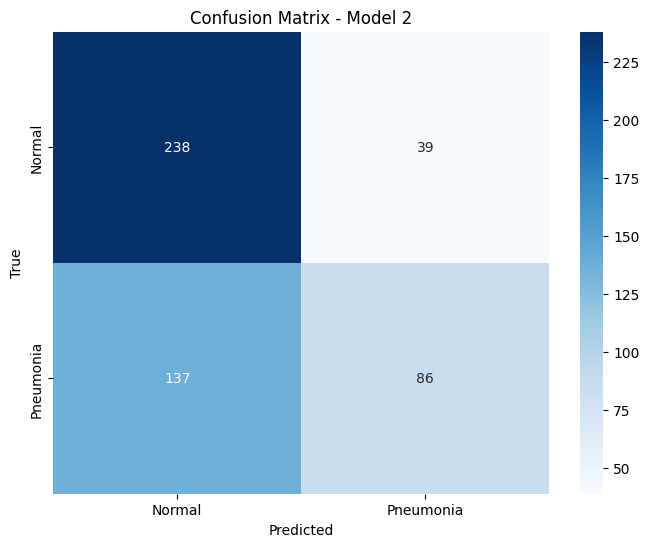

Testing Accuracy for Model 2: 0.648
32/32 [==============================] - 37s 1s/step


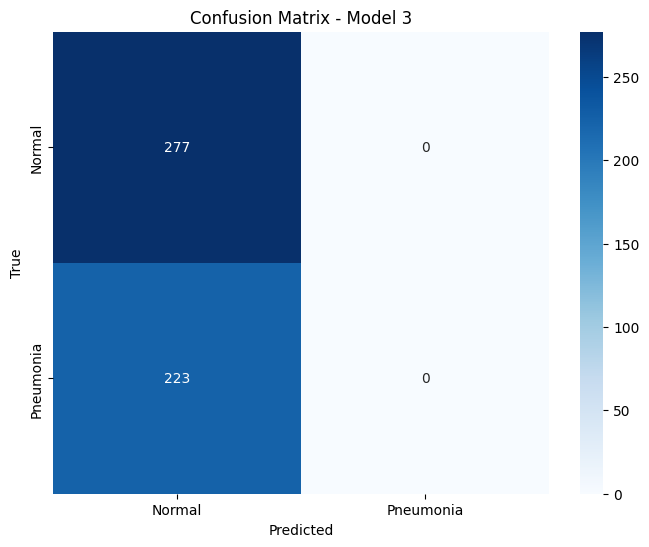

Testing Accuracy for Model 3: 0.554


In [56]:
# List of models
models = [model, model1, vggweight_model]

for idx, curr_model in enumerate(models):
    # Get predictions for the current model
    preds = curr_model.predict(test_data, batch_size=16)
    preds = np.argmax(preds, axis=-1)

    # Original labels
    orig_test_labels = np.argmax(test_labels_binary, axis=-1)

    # Calculate accuracy for the current model
    accuracy = accuracy_score(orig_test_labels, preds)

    # Get the confusion matrix
    cm = confusion_matrix(orig_test_labels, preds)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
    plt.title(f'Confusion Matrix - Model {idx + 1}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print accuracy for the current model
    print(f"Testing Accuracy for Model {idx + 1}: {accuracy}")

In [53]:
# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

Recall of the model is 0.39
Precision of the model is 0.69


# Model with differential privacy

In [61]:
# opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=1e-5)
# dp_optimizer = DPAdamGaussianOptimizer(
#     l2_norm_clip=1.0,
#     noise_multiplier=1.1,
#     num_microbatches=8,
#     learning_rate=0.0001
# )

In [81]:
import diffprivlib.models as dp
from opacus import PrivacyEngine
import torch
import torch.nn as nn
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

In [122]:
# Define the baseline MLP model
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

In [123]:
batch_size = 64  # Adjust as needed
input_size = 224 * 224 * 3  # Adjust based on your image size and channels
hidden_size1 = 128
hidden_size2 = 64
hidden_size3 = 32
output_size = 2  # Assuming binary classification

In [90]:
# Convert validation and test data to PyTorch tensors
valid_data_tensor = torch.tensor(valid_data, dtype=torch.float32)
valid_labels_tensor = torch.tensor(valid_labels_binary, dtype=torch.float32)

test_data_tensor = torch.tensor(test_data, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels_binary, dtype=torch.float32)

In [99]:
train_data = []
train_labels = []

for index, row in train_df.iterrows():
    img_path = row['image_path']  # Adjust this based on your actual column name
    label = row['Finding_Labels']  # Adjust this based on your actual column name

    img = cv2.imread(str(img_path))
    img = cv2.resize(img, (224, 224))

    if img.shape[2] == 1:
        img = np.dstack([img, img, img])

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32) / 255.

    train_data.append(img)
    train_labels.append(label)

# Convert the list into numpy arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)

print("Total number of train examples: ", train_data.shape)
print("Total number of labels:", train_labels.shape)

Total number of train examples:  (3374, 224, 224, 3)
Total number of labels: (3374,)


In [100]:
train_labels_binary = to_categorical(train_labels, num_classes=2)

In [101]:
# Convert train data to PyTorch tensors

train_data_tensor = torch.tensor(train_data, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels_binary, dtype=torch.float32)

In [120]:
train_labels_tensor.shape

torch.Size([3374, 2])

In [124]:
# Define baseline model
baseline_model = MLPModel(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)

In [132]:
def evaluate_model_accuracy(model, X_test_tensor, y_test_tensor):
    with torch.no_grad():
        model.eval()
        y_pred_prob = model(X_test_tensor)
        y_pred_test = (y_pred_prob >= 0.5).float()
        accuracy = (y_pred_test == y_test_tensor).float().mean()
    return accuracy

baseline_accuracy = evaluate_model_accuracy(baseline_model, valid_data_tensor.view(-1, input_size), valid_labels_tensor)
print("Non-private MLP model validation accuracy: %.2f%%" % (baseline_accuracy.item() * 100))


Non-private MLP model validation accuracy: 46.93%


In [106]:
# Define PrivacyEngine parameters
DELTA = 1e-5
EPSILON = 8.0
EPOCHS = 10
MAX_GRAD_NORM = 1.0

In [111]:
def train_model_with_privacy(model, criterion, optimizer, train_loader, num_epochs, DELTA, EPSILON, EPOCHS, MAX_GRAD_NORM):
    """
    Train a PyTorch model with differential privacy.

    This function wraps the model with a PrivacyEngine, which modifies the optimizer to enforce differential privacy.
    It then trains the model for a specified number of epochs, and returns the trained model.

    Parameters:
    model (torch.nn.Module): The PyTorch model to train.
    criterion (torch.nn.Module): The loss function.
    optimizer (torch.optim.Optimizer): The optimizer.
    train_loader (torch.utils.data.DataLoader): The data loader for the training data.
    num_epochs (int): The number of epochs to train for.
    DELTA (float): The target_delta parameter for the PrivacyEngine.
    EPSILON (float): The target_epsilon parameter for the PrivacyEngine.
    EPOCHS (int): The epochs parameter for the PrivacyEngine.
    MAX_GRAD_NORM (float): The max_grad_norm parameter for the PrivacyEngine.

    Returns:
    torch.nn.Module: The trained model.
    """
    # Wrap the model with PrivacyEngine
    privacy_engine = PrivacyEngine()
    model, optimizer, train_loader = privacy_engine.make_private_with_epsilon(
        module=model,
        optimizer=optimizer,
        data_loader=train_loader,
        target_delta=DELTA,
        target_epsilon=EPSILON,
        epochs=EPOCHS,
        max_grad_norm=MAX_GRAD_NORM,
    )

    # Training loop
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            # Forward pass
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

    return model

In [126]:
# Train differentially private model
dp_model = MLPModel(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)
criterion = nn.BCELoss()
optimizer = optim.SGD(dp_model.parameters(), lr=0.01, momentum=0.9)

train_dataset = TensorDataset(torch.tensor(train_data, dtype=torch.float32), torch.tensor(train_labels_binary, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

dp_model = train_model_with_privacy(dp_model, criterion, optimizer, train_loader, num_epochs=3,
                                 DELTA=DELTA, EPSILON=EPSILON, EPOCHS=EPOCHS, MAX_GRAD_NORM=MAX_GRAD_NORM)
# Evaluate differentially private model on validation data
dp_accuracy = evaluate_model_accuracy(dp_model, valid_data_tensor.view(-1, input_size), valid_labels_tensor)
print("Differentially private MLP model validation accuracy: %.2f%%" % (dp_accuracy.item() * 100))

/usr/local/lib/python3.10/dist-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/opacus/accountants/analysis/rdp.py:332: UserWarning: Optimal order is the largest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/opacus/accountants/analysis/prv/prvs.py:50: RuntimeWarning: invalid value encountered in log
  z = np.log((np.exp(t) + q - 1) / q)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1359: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_f

Epoch [1/3], Loss: 0.7137506008148193
Epoch [2/3], Loss: 0.6415263414382935
Epoch [3/3], Loss: 0.7378073930740356
Differentially private MLP model validation accuracy: 53.07%
